In [11]:
import wildmeshing as wm
import igl
import numpy as np
import meshplot as mp
import numpy.linalg as LA
from copy import deepcopy
import json
import os

In [55]:
V, _, _, F, _, _ = igl.read_obj('data/meshes/cube.obj')

  o Cube


In [58]:
V

array([[ 1.,  1., -1.],
       [ 1., -1., -1.],
       [ 1.,  1.,  1.],
       [ 1., -1.,  1.],
       [-1.,  1., -1.],
       [-1., -1., -1.],
       [-1.,  1.,  1.],
       [-1., -1.,  1.]])

In [56]:
mp.plot(V, F)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0, 0.0,…

In [18]:
dir(igl)

['ARAP',
 'ARAP_ENERGY_TYPE_DEFAULT',
 'ARAP_ENERGY_TYPE_ELEMENTS',
 'ARAP_ENERGY_TYPE_SPOKES',
 'ARAP_ENERGY_TYPE_SPOKES_AND_RIMS',
 'BBW',
 'MASSMATRIX_TYPE_BARYCENTRIC',
 'MASSMATRIX_TYPE_FULL',
 'MASSMATRIX_TYPE_VORONOI',
 'PER_VERTEX_NORMALS_WEIGHTING_TYPE_ANGLE',
 'PER_VERTEX_NORMALS_WEIGHTING_TYPE_AREA',
 'PER_VERTEX_NORMALS_WEIGHTING_TYPE_UNIFORM',
 'SIGNED_DISTANCE_TYPE_DEFAULT',
 'SIGNED_DISTANCE_TYPE_PSEUDONORMAL',
 'SIGNED_DISTANCE_TYPE_UNSIGNED',
 'SIGNED_DISTANCE_TYPE_WINDING_NUMBER',
 'SLIM',
 'SLIM_ENERGY_TYPE_ARAP',
 'SLIM_ENERGY_TYPE_CONFORMAL',
 'SLIM_ENERGY_TYPE_EXP_CONFORMAL',
 'SLIM_ENERGY_TYPE_EXP_SYMMETRIC_DIRICHLET',
 'SLIM_ENERGY_TYPE_LOG_ARAP',
 'SLIM_ENERGY_TYPE_SYMMETRIC_DIRICHLET',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'active_set',
 'adjacency_list',
 'adjacency_matrix',
 'all_boundary_loop',
 'all_pairs_distances',
 'ambient_occlusion',
 'arap_linear_block',
 'arap_

In [29]:
?igl.signed_distance

Docstring:
signed_distance(p: array, v: array, f: array, return_normals: bool = False) -> tuple


SIGNED_DISTANCE computes signed distance to a mesh


Parameters
----------
     P  #P by 3 list of query point positions
     V  #V by 3 list of vertex positions
     F  #F by ss list of triangle indices, ss should be 3 unless sign_type
     return_normals  (Optional, defaults to False) If set to True, will return pseudonormals of
                     closest points to each query point in P
Returns
-------
    S  #P list of smallest signed distances
    I  #P list of facet indices corresponding to smallest distances
    C  #P by 3 list of closest points

See also
--------


Notes
-----
    Known issue: This only computes distances to triangles. So unreferenced
    vertices and degenerate triangles are ignored.

Examples
--------
>>> S, I, C = signed_distance(P, V, F, return_normals=False)
Type:      builtin_function_or_method


In [14]:
igl.volume(tm[0], tm[1]).sum()

4.915986441633346e-07

In [30]:
import trimesh

In [44]:
mesh = trimesh.exchange.load.load('testobj.obj')

In [45]:
mesh2 = deepcopy(mesh)

In [48]:
mesh2.vertices += 0.001

In [49]:
mesh3 = trimesh.boolean.boolean_automatic([mesh2, mesh2], operation='intersection')

ValueError: No backends available for boolean operations!

In [32]:
V, _, _, F, _, _ = igl.read_obj('testobj.obj')

In [33]:
areas = igl.doublearea(V, F)

In [37]:
pvals = areas/areas.sum()

In [49]:
pvals[np.random.multinomial(1, pvals).astype(bool)]

array([0.00219219])

In [14]:
igl.is_edge_manifold(F)

True

In [15]:
igl.boundary_loop(F)

array([], dtype=int64)

In [16]:
N = igl.per_face_normals(V, F, np.array([np.inf, np.inf, np.inf], dtype=np.float64))

In [17]:
max([abs((areas * N[:,i]).sum()) for i in range(3)])

2.168404344971009e-19

In [3]:
p=mp.plot(V, F)
p.add_mesh(V+.001, F)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0, 0.00…

1

In [ ]:
tet = wm.Tetrahedralizer(stop_quality=100)

TBB threads 32


In [21]:
dir(tet)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'get_stats',
 'get_tet_mesh',
 'get_tet_mesh_from_csg',
 'load_csg_tree',
 'load_mesh',
 'save',
 'set_log_level',
 'set_mesh',
 'set_meshes',
 'tetrahedralize']

In [5]:
tet.set_meshes([V, V+.001], [F, F])

bbox_diag_length = 0.0392173
ideal_edge_length = 0.00196087
stage = 2
eps_input = 3.92173e-05
eps = 2.17103e-05
eps_simplification = 1.73682e-05
eps_coplanar = 3.92173e-08
dd = 2.61449e-05
dd_simplification = 2.09159e-05


In [6]:
tet.tetrahedralize()

[2022-02-10 17:05:41.532] [float-tetwild] [info] remove duplicates: 
[2022-02-10 17:05:41.532] [float-tetwild] [info] #v: 2528 -> 2528
[2022-02-10 17:05:41.532] [float-tetwild] [info] #f: 5296 -> 5296
collapsing 0.628134
swapping 0.428496
[2022-02-10 17:05:42.592] [float-tetwild] [info] remove duplicates: 
[2022-02-10 17:05:42.592] [float-tetwild] [info] #v: 2356 -> 2356
[2022-02-10 17:05:42.592] [float-tetwild] [info] #f: 4940 -> 4940
[2022-02-10 17:05:42.592] [float-tetwild] [info] #v = 2356
[2022-02-10 17:05:42.592] [float-tetwild] [info] #f = 4940
#boundary_e1 = 24
#boundary_e2 = 0
[2022-02-10 17:05:42.600] [float-tetwild] [info] preprocessing 1.06951s
[2022-02-10 17:05:42.600] [float-tetwild] [info] 
[2022-02-10 17:05:42.739] [float-tetwild] [info] #v = 2850
[2022-02-10 17:05:42.739] [float-tetwild] [info] #t = 17357
[2022-02-10 17:05:42.739] [float-tetwild] [info] tetrahedralizing 0.139601s
[2022-02-10 17:05:42.739] [float-tetwild] [info] 
[2022-02-10 17:05:42.739] [float-tetwild

In [27]:
tm2 = tet.get_tet_mesh_from_csg(json.dumps({"operation":"union", "left": 1, "right": 1}))

[2022-02-10 17:34:15.664] [float-tetwild] [info] after winding number
[2022-02-10 17:34:15.664] [float-tetwild] [info] #v = 5756
[2022-02-10 17:34:15.665] [float-tetwild] [info] #t = 9021
[2022-02-10 17:34:15.665] [float-tetwild] [info] winding number 1.64454e+09s
[2022-02-10 17:34:15.665] [float-tetwild] [info] 


In [28]:
mp.plot(tm2[0],tm2[1])

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0005000…

In [24]:
mp.plot(tm2[0],tm2[1])

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0005000…

In [9]:
tm = tet.get_tet_mesh_from_csg(json.dumps({"operation":"intersection", "left": 0, "right": 1}))

[2022-02-10 17:06:26.027] [float-tetwild] [info] after winding number
[2022-02-10 17:06:26.027] [float-tetwild] [info] #v = 5756
[2022-02-10 17:06:26.027] [float-tetwild] [info] #t = 3894
[2022-02-10 17:06:26.027] [float-tetwild] [info] winding number 1.64454e+09s
[2022-02-10 17:06:26.027] [float-tetwild] [info] 


In [10]:
mp.plot(*tm)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0005000…

# Using points

In [1]:
import pandas as ps

In [2]:
from mechanical.utils import load_concatenated

In [3]:
import matplotlib.pyplot as plt

In [19]:
with open('data/dataset/clean_dataset_with_augmented_fastens.txt','r') as f:
    clean_list = {int(l) for l in f.readlines()}

In [4]:
def check_invalid(x, threshold, strict=False):
    if strict:
        return (x['max_penalty_sliding_0'] > threshold) | (x['max_penalty_sliding_1'] > threshold) | (x['max_penalty_rotating_0'] > threshold) | (x['max_penalty_rotating_1'] > threshold)
    else:
        return (x['penalty_separation_sliding_0'] > threshold) | (x['penalty_separation_sliding_1'] > threshold) \
                | (x['penalty_separation_rotating_0'] > threshold) | (x['penalty_separation_rotating_1'] > threshold) \
                | (x['min_penalty_sliding'] > threshold) | (x['min_penalty_rotating'] > threshold)

In [5]:
def filter_invalid(x, threshold, strict=False):
    return x[lambda df: check_invalid(df, threshold, strict=strict)]

In [6]:
def load_invalids(path, threshold=0.5, incremental=False, subset=None):
    if incremental:
        df = load_concatenated(path, start='mate_penetration_stats')
    else:
        df = ps.read_parquet(os.path.join(path, 'mate_penetration_stats.parquet'))
    if subset is not None:
        df =  df[lambda x: [ass in clean_list for ass in x['Assembly']]]
    
    #return df_filtered, df_filtered[lambda x: (x['min_penalty_sliding'] > threshold) | (x['min_penalty_rotating'] > threshold)]
    return df, filter_invalid(df, threshold)

In [7]:
def plot_invalid(stats, t0, tf, N):
    totalAssemblies = len(set(stats['Assembly']))
    print(totalAssemblies)
    totalMates = stats.shape[0]
    counts = []
    asscounts_strict = []
    asscounts = []
    negatives = []
    basepenalties = []
    baseseparations = []
    ts = np.linspace(t0, tf, N)
    for threshold in ts:
        subset = filter_invalid(stats, threshold)
        subset_strict = filter_invalid(stats, threshold, strict=True)
        subset_base = stats[lambda df: df['base_penetration'] > threshold]
        subset_base_sep = stats[lambda df: df['base_separation'] > threshold]
        assemblyset = set(subset['Assembly'])
        assemblysetbase = set(subset_base['Assembly'])
        assemblysetbase_sep = set(subset_base_sep['Assembly'])
        negatives.append(len(assemblyset.intersection(true_invalids))/len(true_invalids))
        count = subset.shape[0]
        asscount = len(assemblyset)
        counts.append(count/totalMates)
        asscounts.append(asscount/totalAssemblies)
        asscounts_strict.append(len(set(subset_strict['Assembly']))/totalAssemblies)
        basepenalties.append(len(assemblysetbase)/totalAssemblies)
        baseseparations.append(len(assemblysetbase_sep)/totalAssemblies)
    p = plt.plot(ts * 2.5, negatives)
    plt.xlabel('threshold (percent of model diameter)')
    plt.title('fraction of handpicked bad assemblies caught vs. threshold')
    plt.show()
    #plt.subplot(211)
    p = plt.plot(ts * 2.5, counts)
    plt.xlabel('threshold (percent of model diameter)')
    plt.title('fraction invalid mates vs. threshold')
    plt.show()
    
    p = plt.plot(ts * 2.5, basepenalties)
    plt.xlabel('threshold (percent of model diameter)')
    plt.title('fraction assemblies that self penetrate in base configuration vs. threshold')
    plt.show()
    
    p = plt.plot(ts * 2.5, baseseparations)
    plt.xlabel('threshold (percent of model diameter)')
    plt.title('fraction assemblies that have separated parts in base configuration vs. threshold')
    plt.show()
    #plt.subplot(212)
    p = plt.plot(ts * 2.5, asscounts)
    plt.xlabel('threshold (percent of model diameter)')
    plt.title('fraction invalid assemblies vs. threshold')
    plt.show()
    #return p
    p = plt.plot(ts * 2.5, asscounts_strict)
    plt.xlabel('threshold (percent of model diameter)')
    plt.title('fraction strict invalid assemblies vs. threshold')
    plt.show()

In [12]:
threshold = .5
penetration_stats, invalids = load_invalids('/fast/jamesn8/assembly_data/assembly_torch2_fixsize/stats_penetration_bidirectional', threshold=threshold)
penetration_stats2, invalids2 = load_invalids('/fast/jamesn8/assembly_data/assembly_torch2_fixsize/stats_penetration_bidirectional_threshold_0_025', threshold=threshold)
penetration_stats3, invalids3 = load_invalids('/fast/jamesn8/assembly_data/assembly_torch2_fixsize/stats_penetration_bidirectional_threshold_0_025_samples_400', threshold=threshold)
penetration_stats4, invalids4 = load_invalids('/fast/jamesn8/assembly_data/assembly_torch2_fixsize/stats_penetration_bidirectional_threshold_0_025_samples_400_rigidcomps', threshold=threshold)
penetration_stats5, invalids5 = load_invalids('/fast/jamesn8/assembly_data/assembly_torch2_fixsize/stats_penetration_bidirectional_threshold_0_025_samples_1000_rigidcomps_vertices', threshold=threshold)

In [13]:
penetration_stats5.loc[penetration_stats5[lambda x: check_invalid(x, 0.25)].index.difference(penetration_stats5[lambda x: check_invalid(x, 0.5)].index)]

,Assembly,type,base_penetration,base_separation,penalty_separation_sliding_0,penalty_penetration_sliding_0,penalty_separation_rotating_0,penalty_penetration_rotating_0,max_penalty_sliding_0,max_penalty_rotating_0,penalty_separation_sliding_1,penalty_penetration_sliding_1,penalty_separation_rotating_1,penalty_penetration_rotating_1,max_penalty_sliding_1,max_penalty_rotating_1,min_penalty_sliding,min_penalty_rotating
index,,,,,,,,,,,,,,,,,,
407,22,CYLINDRICAL,1.051132e-01,0.0,0.00000,0.106740,0.0,0.104909,0.106740,0.104909,0.399999,0.000000,0.0,0.104910,0.399999,0.104910,0.106740,0.104909
408,22,CYLINDRICAL,1.409637e-01,0.0,0.00000,0.104881,0.0,0.143103,0.104881,0.143103,0.500000,0.000000,0.0,0.144789,0.500000,0.144789,0.104881,0.143103
418,22,CYLINDRICAL,2.085741e-04,0.0,0.44277,0.000000,0.0,0.001900,0.442770,0.001900,0.000000,0.195582,0.0,0.001900,0.195582,0.001900,0.195582,0.001900
1030,40,CYLINDRICAL,3.021214e-01,0.0,0.00000,0.072890,0.0,0.306227,0.072890,0.306227,0.000000,0.279297,0.0,0.362731,0.279297,0.362731,0.072890,0.306227
8830,484,REVOLUTE,2.828771e-01,0.0,0.00000,0.000000,0.0,0.286073,0.000000,0.286073,0.000000,0.000000,0.0,0.286073,0.000000,0.286073,0.000000,0.286073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876747,124565,REVOLUTE,4.028773e-01,0.0,0.00000,0.000000,0.0,0.396699,0.000000,0.396699,0.000000,0.000000,0.0,0.403136,0.000000,0.403136,0.000000,0.396699
1878795,124771,CYLINDRICAL,6.717315e-02,0.0,0.00000,0.320344,0.0,0.210714,0.320344,0.210714,0.000000,0.299693,0.0,0.073309,0.299693,0.073309,0.299693,0.073309
1879714,124875,CYLINDRICAL,3.387321e-01,0.0,0.00000,0.359413,0.0,0.359564,0.359413,0.359564,0.000000,0.340809,0.0,0.345641,0.340809,0.345641,0.340809,0.345641


## Exploring parameters visually

In [290]:
abutting = {87675, 1434, 2972} # has mates that "come right off" in one direction and penetrate in the other direction
detaching = {950}
selfintersects_base = {649, 469, 848, 21334, 21400} #self intersects without even moving first
borderline = {2520, 40, 2401} #2520 is a screw, 2401 has a little wiggle room
selfintersects = {118402}
true_invalids = set()
for s in [abutting, detaching, selfintersects_base, borderline, selfintersects]:
    true_invalids = true_invalids.union(s)

true_valids = {16607}

6448


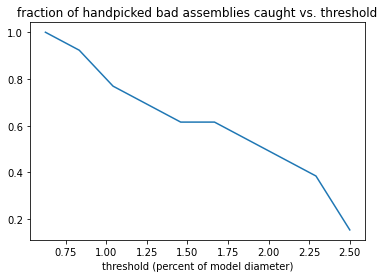

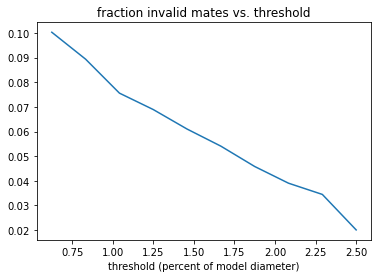

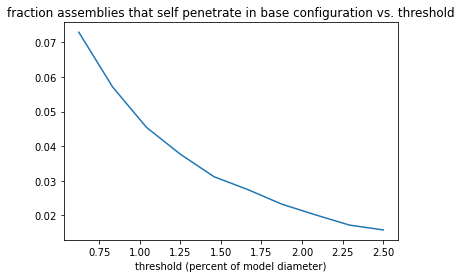

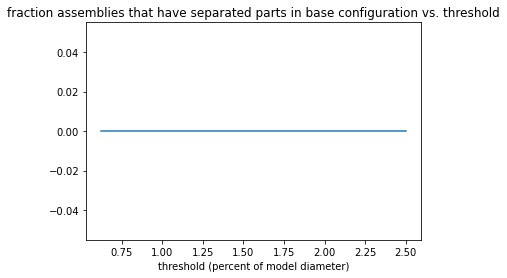

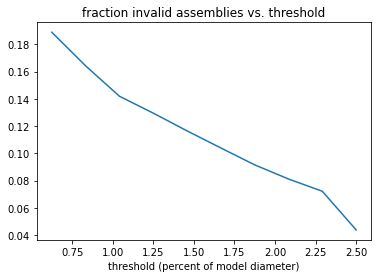

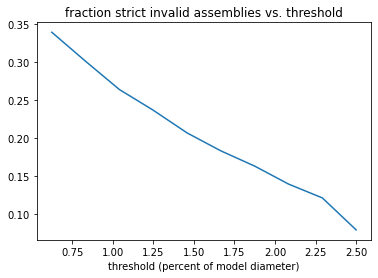

In [333]:
plot_invalid(penetration_stats5, 0.25, 1, 10)


In [284]:
true_invalids.difference(set(invalids5['Assembly']))

{2520, 118402}

In [285]:
true_valids.intersection(set(invalids5['Assembly']))

set()

In [265]:
penetration_stats5[lambda df: (df['penalty_penetration_rotating_0'] > 0.5) & (df['penalty_penetration_rotating_1'] < 0.5) & (df['base_penetration'] < 0.5)]

,Assembly,type,base_penetration,base_separation,penalty_separation_sliding_0,penalty_penetration_sliding_0,penalty_separation_rotating_0,penalty_penetration_rotating_0,max_penalty_sliding_0,max_penalty_rotating_0,penalty_separation_sliding_1,penalty_penetration_sliding_1,penalty_separation_rotating_1,penalty_penetration_rotating_1,max_penalty_sliding_1,max_penalty_rotating_1,min_penalty_sliding,min_penalty_rotating
index,,,,,,,,,,,,,,,,,,
78193,5430,REVOLUTE,4.852031e-01,0.0,0.0,0.0,0.0,0.507283,0.0,0.507283,0.0,0.0,0.0,4.689207e-01,0.0,4.689207e-01,0.0,4.689207e-01
84001,5753,REVOLUTE,4.056662e-02,0.0,0.0,0.0,0.0,1.651908,0.0,1.651908,0.0,0.0,0.0,1.146944e-15,0.0,1.146944e-15,0.0,1.146944e-15
142185,9920,REVOLUTE,1.250963e-01,0.0,0.0,0.0,0.0,0.844191,0.0,0.844191,0.0,0.0,0.0,1.500268e-02,0.0,1.500268e-02,0.0,1.500268e-02
148202,10194,REVOLUTE,2.828601e-02,0.0,0.0,0.0,0.0,1.562839,0.0,1.562839,0.0,0.0,0.0,9.449289e-02,0.0,9.449289e-02,0.0,9.449289e-02
160030,10998,REVOLUTE,4.913846e-02,0.0,0.0,0.0,0.0,0.722025,0.0,0.722025,0.0,0.0,0.0,1.980186e-01,0.0,1.980186e-01,0.0,1.980186e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720246,114271,REVOLUTE,2.068140e-01,0.0,0.0,0.0,0.0,0.674632,0.0,0.674632,0.0,0.0,0.0,1.533427e-01,0.0,1.533427e-01,0.0,1.533427e-01
1730962,114899,REVOLUTE,3.491183e-02,0.0,0.0,0.0,0.0,1.169386,0.0,1.169386,0.0,0.0,0.0,8.260588e-16,0.0,8.260588e-16,0.0,8.260588e-16
1742369,115827,REVOLUTE,2.387641e-01,0.0,0.0,0.0,0.0,0.871753,0.0,0.871753,0.0,0.0,0.0,2.387642e-01,0.0,2.387642e-01,0.0,2.387642e-01


In [263]:
penetration_stats5[lambda df: df['Assembly'] == 2972]

,Assembly,type,base_penetration,base_separation,penalty_separation_sliding_0,penalty_penetration_sliding_0,penalty_separation_rotating_0,penalty_penetration_rotating_0,max_penalty_sliding_0,max_penalty_rotating_0,penalty_separation_sliding_1,penalty_penetration_sliding_1,penalty_separation_rotating_1,penalty_penetration_rotating_1,max_penalty_sliding_1,max_penalty_rotating_1,min_penalty_sliding,min_penalty_rotating
index,,,,,,,,,,,,,,,,,,
43344,2972,SLIDER,2.424104e-12,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.416112,0.0,0.0,0.416112,0.0,0.416112,0.0


In [247]:
penetration_stats5.iloc[100:150]

,Assembly,type,base_penetration,base_separation,penalty_separation_sliding_0,penalty_penetration_sliding_0,penalty_separation_rotating_0,penalty_penetration_rotating_0,max_penalty_sliding_0,max_penalty_rotating_0,penalty_separation_sliding_1,penalty_penetration_sliding_1,penalty_separation_rotating_1,penalty_penetration_rotating_1,max_penalty_sliding_1,max_penalty_rotating_1,min_penalty_sliding,min_penalty_rotating
index,,,,,,,,,,,,,,,,,,
11047,677,CYLINDRICAL,2.354454e-01,0.000000e+00,0.000000,3.393311e-01,0.000000e+00,2.442924e-01,3.393311e-01,2.442924e-01,0.000000,1.535101e-02,0.000000e+00,2.442924e-01,1.535101e-02,2.442924e-01,1.535101e-02,2.442924e-01
11053,680,FASTENED,3.553478e-13,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
11054,680,FASTENED,6.346038e-15,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
11055,680,FASTENED,1.974828e-13,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
11056,680,CYLINDRICAL,3.618399e-02,0.000000e+00,0.000000,3.618399e-02,0.000000e+00,1.378228e-02,3.618399e-02,1.378228e-02,0.000000,3.618399e-02,0.000000e+00,1.378232e-02,3.618399e-02,1.378232e-02,3.618399e-02,1.378228e-02
11115,686,CYLINDRICAL,9.607508e-03,0.000000e+00,0.000000,5.734113e-02,0.000000e+00,1.065474e-01,5.734113e-02,1.065474e-01,0.000000,5.734113e-02,0.000000e+00,3.149560e-01,5.734113e-02,3.149560e-01,5.734113e-02,1.065474e-01
11463,721,REVOLUTE,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,3.741524e-14,0.000000e+00,3.741524e-14,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
11795,759,REVOLUTE,2.021382e-15,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.010691e-15,0.000000e+00,1.010691e-15,0.000000,0.000000e+00,0.000000e+00,1.598043e-15,0.000000e+00,1.598043e-15,0.000000e+00,1.010691e-15
11796,759,FASTENED,1.023247e-14,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [300]:
invalids5[lambda df: ((df['base_penetration'] > .25) | (df['base_separation'] > 0.25))]

,Assembly,type,base_penetration,base_separation,penalty_separation_sliding_0,penalty_penetration_sliding_0,penalty_separation_rotating_0,penalty_penetration_rotating_0,max_penalty_sliding_0,max_penalty_rotating_0,penalty_separation_sliding_1,penalty_penetration_sliding_1,penalty_separation_rotating_1,penalty_penetration_rotating_1,max_penalty_sliding_1,max_penalty_rotating_1,min_penalty_sliding,min_penalty_rotating
index,,,,,,,,,,,,,,,,,,
8676,469,REVOLUTE,0.528768,0.0,0.0,0.000000,0.0,0.528768,0.000000,0.528768,0.000000,0.000000,0.0,0.528768,0.000000,0.528768,0.000000,0.528768
10708,649,REVOLUTE,0.905880,0.0,0.0,0.000000,0.0,0.905880,0.000000,0.905880,0.000000,0.000000,0.0,0.905880,0.000000,0.905880,0.000000,0.905880
12960,848,CYLINDRICAL,0.405064,0.0,0.0,0.851701,0.0,0.975152,0.851701,0.975152,0.000000,0.985329,0.0,0.940038,0.985329,0.940038,0.851701,0.940038
35105,2189,CYLINDRICAL,0.686269,0.0,0.0,0.686269,0.0,0.686269,0.686269,0.686269,0.272427,0.000000,0.0,0.686269,0.272427,0.686269,0.272427,0.686269
38953,2506,CYLINDRICAL,0.639938,0.0,0.0,1.483814,0.0,0.698733,1.483814,0.698733,0.000000,0.156279,0.0,0.714712,0.156279,0.714712,0.156279,0.698733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876769,124572,REVOLUTE,1.297127,0.0,0.0,0.000000,0.0,1.078589,0.000000,1.078589,0.000000,0.000000,0.0,1.078589,0.000000,1.078589,0.000000,1.078589
1876770,124572,REVOLUTE,1.265532,0.0,0.0,0.000000,0.0,1.133680,0.000000,1.133680,0.000000,0.000000,0.0,1.159618,0.000000,1.159618,0.000000,1.133680
1876771,124572,REVOLUTE,0.770781,0.0,0.0,0.000000,0.0,0.942896,0.000000,0.942896,0.000000,0.000000,0.0,0.840477,0.000000,0.840477,0.000000,0.840477


In [222]:
invalids5[lambda df: (df['base_penetration'] > 0.5)].shape[0]

458

In [223]:
invalids5[lambda df: (df['base_separation'] > 0.5)].shape[0]

0

In [150]:
invalids4.loc[invalids4.index.difference(invalids3.index)]

,Assembly,type,base_penetration,base_separation,penalty_separation_sliding_0,penalty_penetration_sliding_0,penalty_separation_rotating_0,penalty_penetration_rotating_0,max_penalty_sliding_0,max_penalty_rotating_0,penalty_separation_sliding_1,penalty_penetration_sliding_1,penalty_separation_rotating_1,penalty_penetration_rotating_1,max_penalty_sliding_1,max_penalty_rotating_1,min_penalty_sliding,min_penalty_rotating
index,,,,,,,,,,,,,,,,,,
21388,1563,REVOLUTE,0.000000e+00,0.315269,0.0,0.000000,0.540541,0.000000e+00,0.000741,5.405409e-01,0.000000,0.000000,5.405409e-01,0.000000,0.000741,5.405409e-01,0.000741,5.405409e-01
38169,2431,CYLINDRICAL,7.527920e-07,0.000000,0.0,0.521909,0.000000,8.487940e-07,0.521909,8.487940e-07,0.000000,0.926032,8.185350e-08,0.000000,0.926032,8.185350e-08,0.521909,8.185350e-08
73888,5108,SLIDER,4.092052e-14,0.000000,0.0,0.896173,0.000000,0.000000e+00,0.896173,0.000000e+00,0.501681,0.000000,0.000000e+00,0.000000,0.501681,0.000000e+00,0.501681,0.000000e+00
91693,6363,REVOLUTE,4.243126e-01,0.000000,0.0,0.000000,0.000000,5.432394e-01,0.000000,5.432394e-01,0.000000,0.000000,0.000000e+00,0.671759,0.000000,6.717591e-01,0.000000,5.432394e-01
91694,6363,REVOLUTE,4.318988e-01,0.000000,0.0,0.000000,0.000000,5.841014e-01,0.000000,5.841014e-01,0.000000,0.000000,0.000000e+00,0.561988,0.000000,5.619876e-01,0.000000,5.619876e-01
91696,6363,REVOLUTE,5.443482e-01,0.000000,0.0,0.000000,0.000000,6.498970e-01,0.000000,6.498970e-01,0.000000,0.000000,0.000000e+00,0.546011,0.000000,5.460111e-01,0.000000,5.460111e-01
157041,10820,REVOLUTE,4.339800e-15,0.000000,0.0,0.000000,0.000000,7.510138e-01,0.000000,7.510138e-01,0.000000,0.000000,0.000000e+00,0.760063,0.000000,7.600628e-01,0.000000,7.510138e-01
206957,14068,REVOLUTE,7.190233e-01,0.000000,0.0,0.000000,0.000000,1.852685e+00,0.000000,1.852685e+00,0.000000,0.000000,9.273865e-01,0.000000,0.000000,9.273865e-01,0.000000,9.273865e-01
227363,15595,SLIDER,1.983208e+00,0.000000,0.0,2.226875,0.000000,0.000000e+00,2.226875,0.000000e+00,0.000000,2.203064,0.000000e+00,0.000000,2.203064,0.000000e+00,2.203064,0.000000e+00


<AxesSubplot:>

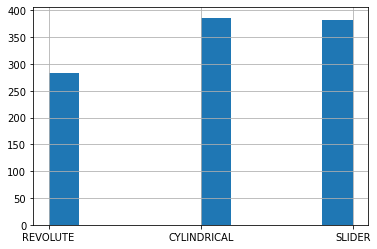

In [93]:
invalids3['type'].hist()

In [76]:
invalids3.loc[invalids3.index.difference(invalids2.index)]

,Assembly,type,base_penetration,base_separation,penalty_separation_sliding_0,penalty_penetration_sliding_0,penalty_separation_rotating_0,penalty_penetration_rotating_0,max_penalty_sliding_0,max_penalty_rotating_0,penalty_separation_sliding_1,penalty_penetration_sliding_1,penalty_separation_rotating_1,penalty_penetration_rotating_1,max_penalty_sliding_1,max_penalty_rotating_1,min_penalty_sliding,min_penalty_rotating
index,,,,,,,,,,,,,,,,,,
33703,2147,CYLINDRICAL,5.568997e-01,0.0,0.0,0.214139,0.0,0.523857,0.214139,0.523857,0.182474,0.000000,0.0,0.649514,0.182474,0.649514,0.182474,0.523857
37883,2401,CYLINDRICAL,5.080431e-13,0.0,0.0,1.000000,0.0,1.140997,1.000000,1.140997,0.000000,0.356346,0.0,1.152065,0.356346,1.152065,0.356346,1.140997
43036,2950,SLIDER,2.795471e-13,0.0,0.0,0.814999,0.0,0.000000,0.814999,0.000000,1.000001,0.000000,0.0,0.000000,1.000001,0.000000,0.814999,0.000000
65306,4611,REVOLUTE,6.825633e-01,0.0,0.0,0.000000,0.0,0.712052,0.000000,0.712052,0.000000,0.000000,0.0,0.515738,0.000000,0.515738,0.000000,0.515738
65307,4611,REVOLUTE,7.120518e-01,0.0,0.0,0.000000,0.0,0.712052,0.000000,0.712052,0.000000,0.000000,0.0,0.712052,0.000000,0.712052,0.000000,0.712052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752660,116603,SLIDER,6.326107e-01,0.0,0.0,0.633413,0.0,0.000000,0.633413,0.000000,0.000000,0.641420,0.0,0.000000,0.641420,0.000000,0.633413,0.000000
1767015,117666,SLIDER,4.323957e-01,0.0,0.0,0.757180,0.0,0.000000,0.757180,0.000000,0.000000,0.595661,0.0,0.000000,0.595661,0.000000,0.595661,0.000000
1769300,117845,SLIDER,8.363287e-01,0.0,0.0,0.550390,0.0,0.000000,0.550390,0.000000,0.000000,1.015194,0.0,0.000000,1.015194,0.000000,0.550390,0.000000


## Write exclusion file from most recent stats

In [14]:
invalids_computed = filter_invalid(penetration_stats5, 0.25)

In [15]:
processed_assemblies = set(penetration_stats5['Assembly'])

In [16]:
assemblies_with_invalids = set(invalids_computed['Assembly'])

In [17]:
len(assemblies_with_invalids)

3544

In [18]:
len(processed_assemblies)

13957

In [19]:
len(assemblies_with_invalids)/len(processed_assemblies)

0.2539227627713692

In [20]:
invalids_computed.shape[0] / penetration_stats5.shape[0]

0.07441712693680043

In [21]:
with open('data/dataset/invalid_threshold_0_25_all_simple_valid.txt','w') as f:
    f.writelines([f'{ass}\n'  for ass in assemblies_with_invalids])

In [358]:
import random
plist = list(processed_assemblies)
random.shuffle(plist)
randomasses = plist[:len(assemblies_with_invalids)]
with open('data/dataset/random_excludes.txt','w') as f:
    f.writelines([f'{ass}\n'  for ass in randomasses])

In [363]:
penetration_stats5.set_index('Assembly').loc[assemblies_with_invalids].shape[0]

2832

In [364]:
penetration_stats5.set_index('Assembly').loc[randomasses].shape[0]

3373

In [324]:
threshold = 0.5
invalids_strict = penetration_stats5[lambda df: (df['max_penalty_sliding_0'] > threshold) | (df['max_penalty_sliding_1'] > threshold) | (df['max_penalty_rotating_0'] > threshold) | (df['max_penalty_rotating_1'] > threshold)]

In [325]:
assemblies_with_strict_invalids = set(invalids_strict['Assembly'])

In [326]:
invalids_strict

,Assembly,type,base_penetration,base_separation,penalty_separation_sliding_0,penalty_penetration_sliding_0,penalty_separation_rotating_0,penalty_penetration_rotating_0,max_penalty_sliding_0,max_penalty_rotating_0,penalty_separation_sliding_1,penalty_penetration_sliding_1,penalty_separation_rotating_1,penalty_penetration_rotating_1,max_penalty_sliding_1,max_penalty_rotating_1,min_penalty_sliding,min_penalty_rotating
index,,,,,,,,,,,,,,,,,,
3588,200,CYLINDRICAL,1.535185e-01,0.000000,0.000000,1.060000,0.000000,1.529906e-01,1.060000,1.529906e-01,0.000000,0.141308,0.000000,7.273212e-01,0.141308,7.273212e-01,0.141308,1.529906e-01
8666,468,SLIDER,0.000000e+00,0.038701,1.038701,0.000000,0.000000,0.000000e+00,1.038701,1.055765e-03,0.000023,0.000000,0.000000,0.000000e+00,0.001056,1.055765e-03,0.001056,1.055765e-03
8667,468,SLIDER,1.085690e-04,0.000000,0.937091,0.000000,0.000000,0.000000e+00,0.937091,0.000000e+00,0.000007,0.000000,0.000000,0.000000e+00,0.000007,0.000000e+00,0.000007,0.000000e+00
8668,468,SLIDER,2.148690e-06,0.000000,0.000000,0.000002,0.000000,0.000000e+00,0.000002,0.000000e+00,0.808688,0.000000,0.000000,0.000000e+00,0.808688,0.000000e+00,0.000002,0.000000e+00
8669,468,SLIDER,1.834209e-06,0.000000,0.000000,0.000002,0.000000,0.000000e+00,0.000002,0.000000e+00,0.910299,0.000000,0.000000,0.000000e+00,0.910299,0.000000e+00,0.000002,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878620,124748,CYLINDRICAL,1.994998e-01,0.000000,0.800500,0.000000,0.000000,1.994998e-01,0.800500,1.994998e-01,0.295263,0.000000,0.000000,1.994998e-01,0.295263,1.994998e-01,0.295263,1.994998e-01
1880144,124924,CYLINDRICAL,6.422914e-07,0.000000,0.000000,0.764637,0.000000,6.422914e-07,0.764637,6.422914e-07,0.000000,0.724137,0.000000,6.422914e-07,0.724137,6.422914e-07,0.724137,6.422914e-07
1880869,124997,REVOLUTE,6.572714e-01,0.000000,0.000000,0.000000,0.000000,6.572714e-01,0.000000,6.572714e-01,0.000000,0.000000,0.000000,6.572714e-01,0.000000,6.572714e-01,0.000000,6.572714e-01


In [327]:
len(assemblies_with_strict_invalids)

1525

In [68]:
assemblies_with_strict_invalids

{8192,
 81923,
 65540,
 57349,
 57350,
 98307,
 98311,
 81933,
 57358,
 98325,
 22,
 81942,
 49177,
 65562,
 98330,
 65564,
 16413,
 98338,
 65572,
 16421,
 40,
 41000,
 98346,
 45,
 32815,
 49203,
 8248,
 24633,
 32826,
 57402,
 65592,
 81978,
 90168,
 57407,
 41024,
 65,
 73791,
 114750,
 114753,
 16453,
 41029,
 24648,
 57416,
 57417,
 98377,
 98379,
 106570,
 65617,
 83,
 16474,
 90202,
 32862,
 82016,
 106592,
 122978,
 65636,
 98404,
 16488,
 73833,
 122986,
 98412,
 114797,
 90222,
 73840,
 57457,
 106608,
 24693,
 65655,
 16507,
 98427,
 49277,
 98432,
 41091,
 49284,
 24709,
 90246,
 41095,
 24713,
 8330,
 57483,
 82059,
 24717,
 90256,
 65681,
 106641,
 8340,
 98453,
 82077,
 106654,
 90271,
 65696,
 49313,
 65701,
 73900,
 65709,
 82092,
 65711,
 114862,
 24753,
 24754,
 106675,
 114863,
 182,
 73911,
 90295,
 106680,
 123063,
 82107,
 41149,
 57534,
 90302,
 8385,
 16582,
 199,
 200,
 123081,
 41162,
 73934,
 24783,
 32976,
 98512,
 24786,
 114899,
 57563,
 123099,
 98527,


## Some visualization

In [77]:
meshes = torch.load('/fast/jamesn8/assembly_data/assembly_torch2_fixsize/mesh/16607.dat')
meshes = [(mesh[0].numpy(), mesh[1].numpy()) for mesh in meshes]

NameError: name 'torch' is not defined

In [78]:
meshes[0][0].shape

NameError: name 'meshes' is not defined

In [76]:
#p = mp.plot(sample_surface_points(*meshes[1], 1000)[0])
p = mp.plot(np.vstack([sample_surface_points(*meshes[1], 1000)[0], meshes[1][0]]))
p.add_mesh(*meshes[0])
p

NameError: name 'sample_surface_points' is not defined

## Motion analysis

In [81]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import seaborn as sn

In [189]:
mate_types = [
    'SLIDER',
    'REVOLUTE',
    'CYLINDRICAL',
    'FASTENED',
]

In [190]:
def mate_type(sl, ro):
    if sl:
        if ro:
            return 'CYLINDRICAL'
        else:
            return 'SLIDER'
    else:
        if ro:
            return 'REVOLUTE'
        else:
            return 'FASTENED'

In [240]:
def mate_dofs(t):
    "return (slides, rotates)"
    return (t == 'SLIDER' or t == 'CYLINDRICAL'), (t == 'REVOLUTE' or t == 'CYLINDRICAL')

In [191]:
def check_motions(x, threshold, strict=False):
    if strict:
        slides = (x['max_penalty_sliding_0'] < threshold) & (x['max_penalty_sliding_1'] < threshold)
        rotates = (x['max_penalty_rotating_0'] < threshold) & (x['max_penalty_rotating_1'] < threshold)
    else:
        slides = (x['penalty_separation_sliding_0'] < threshold) & (x['penalty_separation_sliding_1'] < threshold) & (x['min_penalty_sliding'] < threshold)
        rotates = (x['penalty_separation_rotating_0'] < threshold) & (x['penalty_separation_rotating_1'] < threshold) & (x['min_penalty_rotating'] < threshold)
        
    types = x['type']

    correct = ((types == 'REVOLUTE') & rotates) | ((types == 'SLIDER') & slides) | ((types == 'CYLINDRICAL') & rotates & slides) |  (types == 'FASTENED')
    exact = ((types == 'REVOLUTE') & rotates & (~slides)) | ((types == 'SLIDER') & slides & (~rotates)) | ((types == 'CYLINDRICAL') & rotates & slides) |  ((types == 'FASTENED') & (~rotates) & (~slides))
        
    return ps.DataFrame({'type': types, 'slides':slides, 'rotates': rotates, 'canmove': correct, 'exact': exact})

In [192]:
def plot_confusion_matrix(cm, labels, normalization = (1, 'Actual Avg.'), name='', ax=None):
    norm_axis = normalization[0]
    if norm_axis >= 0:
        totals = cm.sum(norm_axis, keepdims=True)
        totals[np.where(totals == 0)] = 1
        cm = cm / totals
    fmt = '.1%'
    if norm_axis < 0:
        fmt = 'n'
    
    fig = Figure(figsize=(8, 8))
    ax = fig.add_subplot()
    ax = sn.heatmap(cm, annot=True, fmt=fmt, cmap='PuBu', ax=ax)
    name = name + ' ' if len(name) > 0 else name
    ax.set_title(f'{name}Confusion Matrix: {normalization[1]}')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticklabels(labels, rotation=0)
    return fig

In [296]:
motion_df = ps.read_parquet('/fast/jamesn8/assembly_data/assembly_torch2_fixsize/full_pipeline_new_penetration/mate_penetration_stats.parquet')

In [297]:
motion_df

,Assembly,type,base_penetration,base_separation,penalty_separation_sliding_0,penalty_penetration_sliding_0,penalty_separation_rotating_0,penalty_penetration_rotating_0,max_penalty_sliding_0,max_penalty_rotating_0,penalty_separation_sliding_1,penalty_penetration_sliding_1,penalty_separation_rotating_1,penalty_penetration_rotating_1,max_penalty_sliding_1,max_penalty_rotating_1,min_penalty_sliding,min_penalty_rotating
index,,,,,,,,,,,,,,,,,,
393,19,REVOLUTE,7.808587e-07,0.000000,0.000000,7.808587e-07,0.0,0.117648,7.808587e-07,0.117648,0.000000,0.345928,0.0,0.159198,0.345928,0.159198,7.808587e-07,0.117648
394,19,FASTENED,2.317774e-11,0.000000,0.000000,1.011536e-01,0.0,0.247785,1.011536e-01,0.247785,0.000000,0.118993,0.0,0.235481,0.118993,0.235481,1.011536e-01,0.235481
1030,40,CYLINDRICAL,6.042428e-01,0.000000,0.000000,2.152775e-01,0.0,0.612454,2.152775e-01,0.612454,0.180848,0.000000,0.0,0.725461,0.180848,0.725461,1.808484e-01,0.612454
1478,65,FASTENED,5.434287e-13,0.000000,0.000000,4.462289e-01,0.0,0.457904,4.462289e-01,0.457904,0.000000,0.589580,0.0,0.447555,0.589580,0.447555,4.462289e-01,0.447555
1479,65,SLIDER,0.000000e+00,0.001823,0.003086,0.000000e+00,0.0,0.016356,3.085827e-03,0.016356,0.000000,0.062115,0.0,0.016356,0.062115,0.016356,3.085827e-03,0.016356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882555,125132,FASTENED,4.590301e-10,0.000000,0.000000,1.000000e+00,0.0,1.894865,1.000000e+00,1.894865,0.000000,1.000000,0.0,1.972397,1.000000,1.972397,1.000000e+00,1.894865
1882556,125132,FASTENED,7.729269e-10,0.000000,0.000000,9.999999e-01,0.0,1.998978,9.999999e-01,1.998978,0.000000,1.000000,0.0,1.995061,1.000000,1.995061,9.999999e-01,1.995061
1882557,125132,FASTENED,3.611769e-09,0.000000,0.000000,9.999999e-01,0.0,1.981708,9.999999e-01,1.981708,0.000000,1.000000,0.0,1.981531,1.000000,1.981531,9.999999e-01,1.981531


In [294]:
amotion_df = ps.read_parquet('/fast/jamesn8/assembly_data/assembly_torch2_fixsize/full_pipeline_new_penetration/augmented_mate_penetration_stats.parquet')

In [295]:
amotion_df

,Assembly,type,base_penetration,base_separation,penalty_separation_sliding_0,penalty_penetration_sliding_0,penalty_separation_rotating_0,penalty_penetration_rotating_0,max_penalty_sliding_0,max_penalty_rotating_0,penalty_separation_sliding_1,penalty_penetration_sliding_1,penalty_separation_rotating_1,penalty_penetration_rotating_1,max_penalty_sliding_1,max_penalty_rotating_1,min_penalty_sliding,min_penalty_rotating
index,,,,,,,,,,,,,,,,,,
0,19,REVOLUTE,7.808587e-07,0.000000,0.000000,7.808587e-07,0.000000,0.117647,7.808587e-07,0.117647,0.000000,3.485277e-01,0.000000,0.137711,3.485277e-01,0.137711,7.808587e-07,0.117647
69,65,SLIDER,0.000000e+00,0.001823,0.002505,0.000000e+00,0.000000,0.016356,2.504917e-03,0.016356,0.000000,6.211455e-02,0.000000,0.016356,6.211455e-02,0.016356,2.504917e-03,0.016356
71,98,REVOLUTE,0.000000e+00,0.119899,0.000000,8.374241e-01,0.119899,0.000000,8.374241e-01,0.119899,0.498009,0.000000e+00,0.119899,0.000000,4.980093e-01,0.119899,4.980093e-01,0.119899
74,108,REVOLUTE,2.573035e-07,0.000000,0.000000,2.573035e-07,0.000000,0.096644,2.573035e-07,0.096644,0.000000,2.573035e-07,0.000000,0.095362,2.573035e-07,0.095362,2.573035e-07,0.095362
75,108,REVOLUTE,1.156775e-02,0.000000,0.000000,8.273987e-01,0.000000,0.083368,8.273987e-01,0.083368,0.000000,1.065943e-02,0.000000,0.094880,1.065943e-02,0.094880,1.065943e-02,0.083368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57114,125128,REVOLUTE,0.000000e+00,0.294350,0.294289,0.000000e+00,0.294739,0.000000,2.942890e-01,0.294739,0.294201,0.000000e+00,0.294409,0.000000,2.942014e-01,0.294409,2.942014e-01,0.294409
57115,125132,SLIDER,5.809665e-03,0.000000,0.000000,5.809665e-03,0.000000,1.918713,5.809665e-03,1.918713,0.000000,5.809665e-03,0.000000,1.659331,5.809665e-03,1.659331,5.809665e-03,1.659331
57116,125132,SLIDER,5.809665e-03,0.000000,0.000000,5.809665e-03,0.000000,1.936440,5.809665e-03,1.936440,0.000000,5.809665e-03,0.000000,1.969842,5.809665e-03,1.969842,5.809665e-03,1.936440


In [197]:
def analyze_motions(motion_df):
    motion_results = check_motions(motion_df, 0.25)
    motion_results['phystype'] = [mate_type(sl, ro) for sl, ro in zip(motion_results['slides'], motion_results['rotates'])]
    confusion = {}
    motionfiltered = motion_results[lambda df: df['canmove']]
    for i in motionfiltered.index:
        t = motionfiltered.loc[i, 'type']
        pt = motionfiltered.loc[i, 'phystype']
        if (t, pt) not in confusion:
            confusion[(t, pt)] = 0
        confusion[(t, pt)] += 1
    mat = np.zeros([4,4], dtype=np.int64)
    for k in confusion:
        mat[mate_types.index(k[0]), mate_types.index(k[1])] = confusion[k]
    
    acc = motionfiltered['exact'].sum() / motionfiltered.shape[0]
    acctotal = motion_results['exact'].sum() / motion_results.shape[0]
    fraction_canmove = motionfiltered.shape[0]/motion_results.shape[0]
    
    accs = motion_results.groupby('type')[['canmove','exact']].agg([sum,'count'])
    accs['fraction_can_move'] = accs['canmove']['sum']/accs['canmove']['count']
    accs['fraction_exact'] = accs['exact']['sum']/accs['exact']['count']
    
    return {'accuracy_canmove': acc, 'accuracy_total': acctotal, 'type_stats': accs, 'fraction_canmove': fraction_canmove, 'confusion': mat}

In [298]:
out_dict = analyze_motions(motion_df)
print(out_dict)

{'accuracy_canmove': 0.6637253550255067, 'accuracy_total': 0.591206811855248, 'type_stats':             canmove        exact        fraction_can_move fraction_exact
                sum  count   sum  count                                 
type                                                                    
CYLINDRICAL    1384   2330  1384   2330          0.593991       0.593991
FASTENED       7867   7867  6619   7867          1.000000       0.841363
REVOLUTE       9548  10384  5362  10384          0.919492       0.516371
SLIDER         2960   3847  1077   3847          0.769431       0.279958, 'fraction_canmove': 0.8907401342721467, 'confusion': array([[1077,    0, 1883,    0],
       [   0, 5362, 4186,    0],
       [   0,    0, 1384,    0],
       [ 105,  671,  472, 6619]])}


<AxesSubplot:title={'center':'fraction_can_move'}, xlabel='type'>

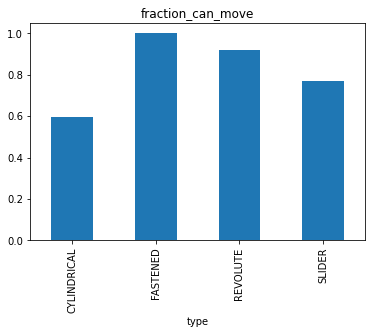

In [299]:
out_dict['type_stats']['fraction_can_move'].plot.bar(title='fraction_can_move')

<AxesSubplot:title={'center':'fraction_exact'}, xlabel='type'>

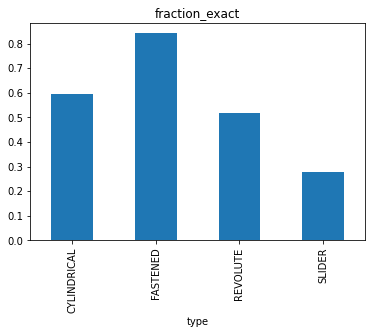

In [300]:
out_dict['type_stats']['fraction_exact'].plot.bar(title='fraction_exact')

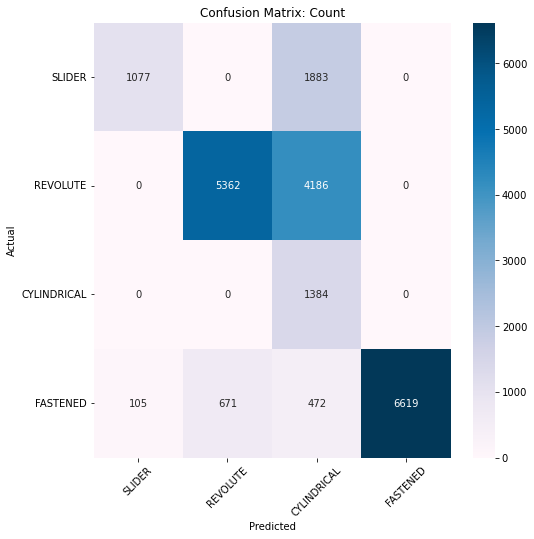

In [301]:
plot_confusion_matrix(out_dict['confusion'], mate_types, (-1, 'Count'))

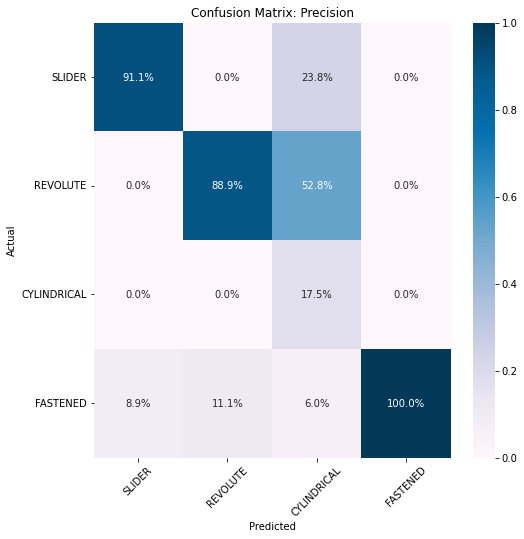

In [302]:
plot_confusion_matrix(out_dict['confusion'], mate_types, (0, 'Precision'))

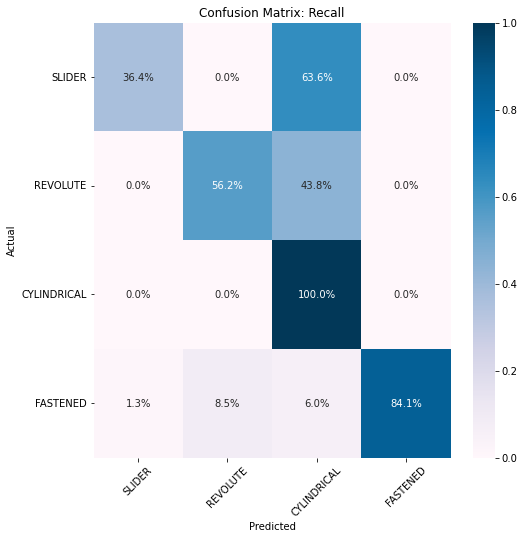

In [303]:
plot_confusion_matrix(out_dict['confusion'], mate_types, (1, 'Recall'))

### Augmented

In [304]:
out_dict = analyze_motions(amotion_df)
print(out_dict)

{'accuracy_canmove': 0.39443212613944323, 'accuracy_total': 0.32847763643824374, 'type_stats':             canmove       exact       fraction_can_move fraction_exact
                sum count   sum count                                 
type                                                                  
CYLINDRICAL     296   607   296   607          0.487644       0.487644
REVOLUTE       2997  3326  1075  3326          0.901082       0.323211
SLIDER          766   941   230   941          0.814028       0.244421, 'fraction_canmove': 0.8327862125564218, 'confusion': array([[ 230,    0,  536,    0],
       [   0, 1075, 1922,    0],
       [   0,    0,  296,    0],
       [   0,    0,    0,    0]])}


<AxesSubplot:title={'center':'fraction_can_move'}, xlabel='type'>

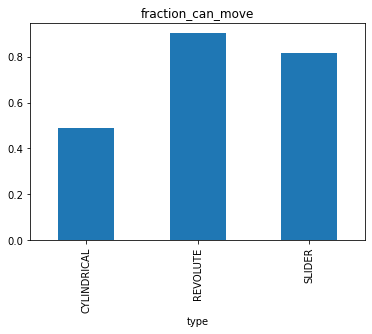

In [305]:
out_dict['type_stats']['fraction_can_move'].plot.bar(title='fraction_can_move')

<AxesSubplot:title={'center':'fraction_exact'}, xlabel='type'>

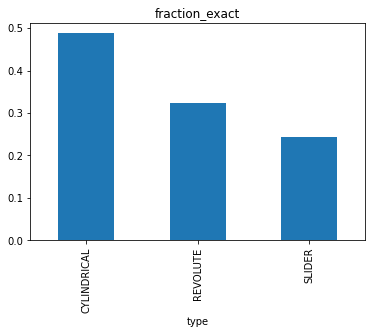

In [306]:
out_dict['type_stats']['fraction_exact'].plot.bar(title='fraction_exact')

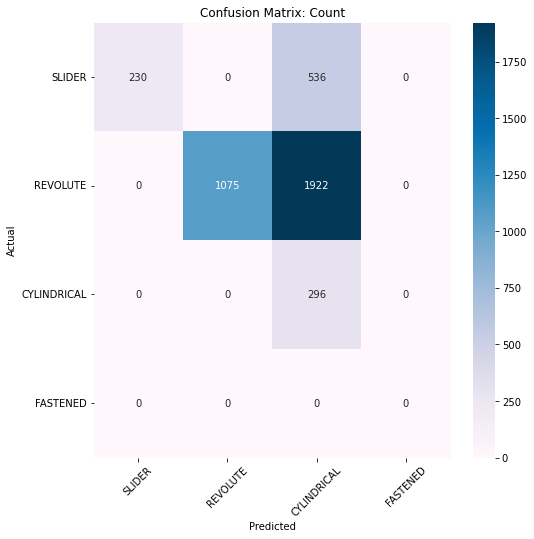

In [307]:
plot_confusion_matrix(out_dict['confusion'], mate_types, (-1, 'Count'))

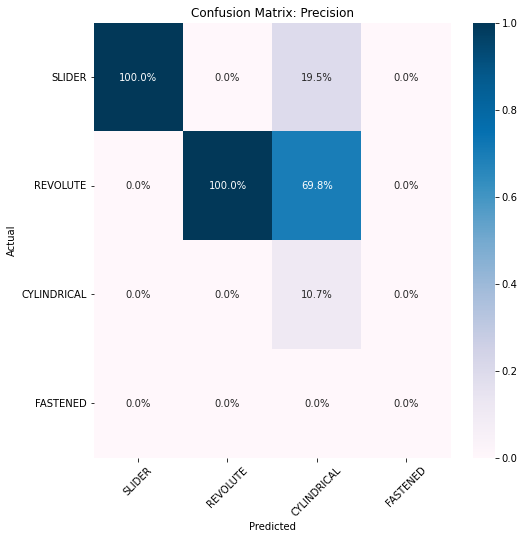

In [308]:
plot_confusion_matrix(out_dict['confusion'], mate_types, (0, 'Precision'))

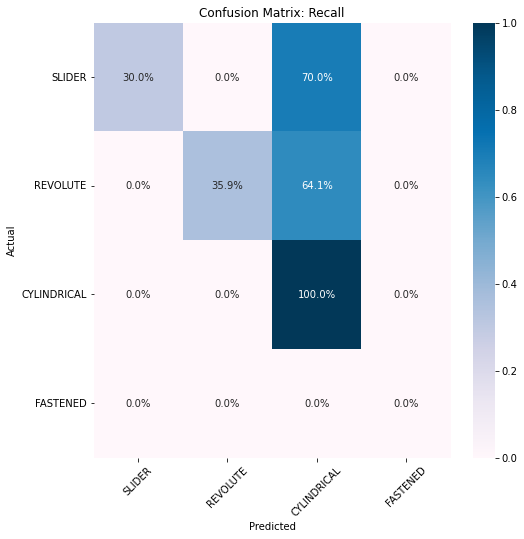

In [309]:
plot_confusion_matrix(out_dict['confusion'], mate_types, (1, 'Recall'))

In [311]:
out_dict['type_stats']

canmove       exact       fraction_can_move fraction_exact
                sum count   sum count                                 
type                                                                  
CYLINDRICAL     296   607   296   607          0.487644       0.487644
REVOLUTE       2997  3326  1075  3326          0.901082       0.323211
SLIDER          766   941   230   941          0.814028       0.244421

## debug penetration axis for augmented data

In [312]:
check_motions(amotion_df[lambda df: df['Assembly'] == 108], 0.25)

,type,slides,rotates,canmove,exact
index,,,,,
74,REVOLUTE,True,True,True,False
75,REVOLUTE,True,True,True,False
76,REVOLUTE,True,True,True,False
77,REVOLUTE,True,True,True,False
78,REVOLUTE,True,True,True,False
79,REVOLUTE,True,True,True,False


In [313]:
amotion_df[lambda df: df['Assembly'] == 108]

,Assembly,type,base_penetration,base_separation,penalty_separation_sliding_0,penalty_penetration_sliding_0,penalty_separation_rotating_0,penalty_penetration_rotating_0,max_penalty_sliding_0,max_penalty_rotating_0,penalty_separation_sliding_1,penalty_penetration_sliding_1,penalty_separation_rotating_1,penalty_penetration_rotating_1,max_penalty_sliding_1,max_penalty_rotating_1,min_penalty_sliding,min_penalty_rotating
index,,,,,,,,,,,,,,,,,,
74,108,REVOLUTE,2.573035e-07,0.0,0.0,2.573035e-07,0.0,0.096644,2.573035e-07,0.096644,0.0,2.573035e-07,0.0,0.095362,2.573035e-07,0.095362,2.573035e-07,0.095362
75,108,REVOLUTE,1.156775e-02,0.0,0.0,8.273987e-01,0.0,0.083368,8.273987e-01,0.083368,0.0,1.065943e-02,0.0,0.094880,1.065943e-02,0.094880,1.065943e-02,0.083368
76,108,REVOLUTE,1.168826e-02,0.0,0.0,7.990579e-01,0.0,0.095300,7.990579e-01,0.095300,0.0,1.116382e-02,0.0,0.085069,1.116382e-02,0.085069,1.116382e-02,0.085069
77,108,REVOLUTE,2.573035e-07,0.0,0.0,2.573035e-07,0.0,0.094194,2.573035e-07,0.094194,0.0,2.573035e-07,0.0,0.093903,2.573035e-07,0.093903,2.573035e-07,0.093903
78,108,REVOLUTE,1.123386e-02,0.0,0.0,7.344343e-01,0.0,0.093083,7.344343e-01,0.093083,0.0,1.041182e-02,0.0,0.087298,1.041182e-02,0.087298,1.041182e-02,0.087298
79,108,REVOLUTE,8.494839e-03,0.0,0.0,8.211725e-01,0.0,0.088339,8.211725e-01,0.088339,0.0,1.059923e-02,0.0,0.095123,1.059923e-02,0.095123,1.059923e-02,0.088339


<AxesSubplot:>

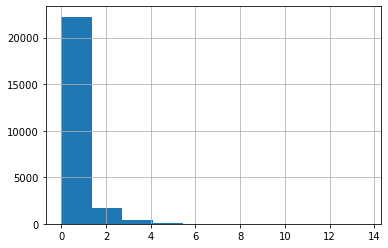

In [314]:
motion_df['min_penalty_rotating'].hist()

<AxesSubplot:>

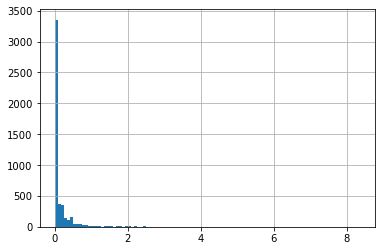

In [315]:
amotion_df['min_penalty_rotating'].hist(bins=100)

In [316]:
import torch, h5py

In [317]:
from mechanical.utils import joinmeshes

In [318]:
batch = torch.load('/fast/jamesn8/assembly_data/assembly_torch2_fixsize/full_pipeline/batches/1030.dat')

In [319]:
savedmesh = torch.load('/fast/jamesn8/assembly_data/assembly_torch2_fixsize/mesh/1030.dat')
savedmesh = [(V.numpy(), F.numpy()) for V, F in savedmesh]

In [320]:
axisdata = h5py.File('/fast/jamesn8/assembly_data/assembly_torch2_fixsize/full_pipeline/axis_data/1030.hdf5')
norm_tf = np.array(axisdata['normalization_matrix'])
inv_tf = LA.inv(norm_tf)
axisdata.close()

In [321]:
totalmesh = joinmeshes(savedmesh)

In [322]:
p = mp.plot(batch.V.numpy() / inv_tf[3,3], batch.F.T.numpy())
p.add_mesh(*totalmesh)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0, 0.0,…

1

In [323]:
batch.V.numpy().max(0)

array([0.3464567 , 0.18897638, 0.5       ], dtype=float32)

# Combine predictions with motion analysis

preds = ps.read_parquet('/projects/grail/jamesn8/projects/mechanical/automate-private/predictions_val.parquet')

In [351]:
preds = ps.read_parquet('/projects/grail/jamesn8/projects/mechanical/automate-private/predictions_test.parquet')

In [352]:
preds_and_phys = preds[lambda df: df['mate_index'] >= 0].set_index('mate_index').join(motion_results).drop('mate_label', axis=1)
preds_and_phys['predictions'] = [mate_types[l] for l in preds_and_phys['predictions']]
preds_and_phys['pred_slides'], preds_and_phys['pred_rotates'] = zip(*[mate_dofs(t) for t in preds_and_phys['predictions']])
preds_and_phys['combined_type'] = [mate_type(sl, ro) for sl, ro in zip((preds_and_phys['pred_slides'] & preds_and_phys['slides']), (preds_and_phys['pred_rotates'] & preds_and_phys['rotates']))]

In [353]:
(preds_and_phys['predictions'] == preds_and_phys['type']).sum() / preds_and_phys.shape[0]

0.7922077922077922

In [354]:
(preds_and_phys['combined_type'] == preds_and_phys['type']).sum() / preds_and_phys.shape[0]

0.7987012987012987

In [355]:
(preds_and_phys['phystype'] == preds_and_phys['type']).sum() / preds_and_phys.shape[0]

0.5922077922077922

# Check that axis motions agree with mate moations df

In [363]:
df_name = '/fast/jamesn8/assembly_data/assembly_data_with_transforms_all.h5'
mate_df = ps.read_hdf(df_name,'mate')

In [368]:
df_name_part = '/fast/jamesn8/assembly_data/assembly_data_with_transforms_all.h5_segmentation.h5'
part_df = ps.read_hdf(df_name_part,'part')
part_df.set_index(['Assembly','PartOccurrenceID'], inplace=True)

In [370]:
nums = []
num = 0
lastAssembly = -1
for i in range(part_df.shape[0]):
    ass = part_df.index[i][0]
    if ass != lastAssembly:
        num = 0
        lastAssembly = ass
    nums.append(num)
    num += 1
part_df['part_indices'] = nums

In [410]:
pairs = []
mate_df_subset = mate_df.loc[motion_df.index]
for i in range(mate_df_subset.shape[0]):
    row = mate_df_subset.iloc[i]
    ass = row['Assembly']
    p1 = part_df.loc[(ass, row['Part1']), 'part_indices']
    p2 = part_df.loc[(ass, row['Part2']), 'part_indices']
    pairs.append(tuple(sorted([p1, p2])))
mate_df_subset.rename({'Part1': 'Part1_occ','Part2': 'Part2_occ'}, axis=1, inplace=True)
mate_df_subset['part1'] = [pair[0] for pair in pairs]
mate_df_subset['part2'] = [pair[1] for pair in pairs]

In [411]:
mate_df_subset['mate_index'] = mate_df_subset.index
mate_df_subset.set_index(['Assembly', 'part1','part2'], inplace=True)

In [412]:
mate_check_df = ps.read_parquet('/fast/jamesn8/assembly_data/assembly_torch2_fixsize/full_pipeline/mate_check_stats.parquet')

In [413]:
axisinds = mate_check_df.loc[ps.Index(mate_df_subset['mate_index']), 'axis_index']
mate_df_subset['axis'] = list(axisinds)
mate_df_subset.set_index('axis', append=True, inplace=True)

In [460]:
axis_motion_df = ps.read_parquet('/fast/jamesn8/assembly_data/assembly_torch2_fixsize/test_penetration_all_axes/axis_penetration_stats.parquet')
#axis_motion_df = ps.read_parquet('/fast/jamesn8/assembly_data/assembly_torch2_fixsize/full_pipeline_new_penetration_all_axes_400points2/axis_penetration_stats_100.parquet')

In [465]:
combined = mate_df_subset.join(axis_motion_df).join(motion_df, on='mate_index', lsuffix='_axis')

In [466]:
combined[['min_penalty_rotating', 'min_penalty_rotating_axis']]

min_penalty_rotating  min_penalty_rotating_axis
Assembly part1 part2 axis                                                 
19       0     1     514               0.117648               2.425619e-15
         1     2     518               0.235481               6.901881e-08
40       0     1     0                 0.612454               6.124544e-01
65       0     1     74                0.008660               1.013829e-02
               2     11                0.366865               3.668654e-01
...                                         ...                        ...
125132   2     3     524               0.881611                        NaN
         3     4     2575              1.970546                        NaN
               5     2584              1.894865                        NaN
               6     2305              1.995061                        NaN
               9     3164              1.737061                        NaN

[24428 rows x 2 columns]

In [467]:
combined[lambda df: ~df['min_penalty_rotating'].isnull() & (abs(df['min_penalty_rotating'] - df['min_penalty_rotating_axis']) > 0.1)][['min_penalty_rotating', 'min_penalty_rotating_axis','mate_index']]

min_penalty_rotating  min_penalty_rotating_axis  \
Assembly part1 part2 axis                                                    
19       0     1     514               0.117648               2.425619e-15   
         1     2     518               0.235481               6.901881e-08   
65       0     4     500               0.991662               5.812076e-01   
         1     5     2119              0.016356               2.003122e-01   
108      0     2     59                1.367963               5.229918e-13   
...                                         ...                        ...   
1640     4     5     785               0.210469               1.238552e-07   
1720     0     3     64                0.190484               3.351711e-07   
               4     2068              0.190484               3.531494e-03   
         1     2     826               0.162476               6.750581e-07   
               6     3105              0.162847               6.980784e-07   

                           mate_index  
Assembly part1 part2 axis              
19       0     1     514          393  
         1     2     518          394  
65       0     4     500         1483  
         1     5     2119        1479  
108      0     2     59          2231  
...                               ...  
1640     4     5     785        23641  
1720     0     3     64         25446  
               4     2068       25445  
         1     2     826        25442  
               6     3105       25443  

[112 rows x 3 columns]

In [452]:
combined[lambda df: ~df['min_penalty_rotating'].isnull() & (df['min_penalty_rotating_axis'] > 0) & (df['min_penalty_rotating_axis'] < 0.001)][['min_penalty_rotating', 'min_penalty_rotating_axis','mate_index']]

min_penalty_rotating  min_penalty_rotating_axis  \
Assembly part1 part2 axis                                                    
90       0     1     24            7.841778e-15               1.903247e-14   
142      0     12    2             1.152352e-14               6.645343e-14   
         1     6     2             3.260648e-07               3.260648e-07   
         3     7     2             6.521296e-07               6.521296e-07   
         4     10    2             2.429372e-15               1.304259e-06   
...                                         ...                        ...   
1758     20    22    30            2.843733e-07               2.843733e-07   
         24    26    1450          2.118746e-15               2.118746e-15   
         25    27    1450          2.843733e-07               2.843733e-07   
         29    31    2011          2.118746e-15               2.118746e-15   
         30    32    2011          2.843733e-07               2.843733e-07   

                           mate_index  
Assembly part1 part2 axis              
90       0     1     24          2033  
142      0     12    2           2600  
         1     6     2           2601  
         3     7     2           2602  
         4     10    2           2603  
...                               ...  
1758     20    22    30         26619  
         24    26    1450       26622  
         25    27    1450       26623  
         29    31    2011       26626  
         30    32    2011       26627  

[100 rows x 3 columns]

In [448]:
mate_df_subset.loc[1720]

Part1_occ          Part2_occ      Type  \
part1 part2 axis                                                   
4     5     2090  MkhOCYi1zbRgf/STE  MpqdlYolKLf1T7OuY  REVOLUTE   
3     5     2090  MubXpLy+LrIvxNthu  MkhOCYi1zbRgf/STE  REVOLUTE   
1     2     826   Mn5qefj3GRsyD4suG  M4KjpPt9KX+HAvPgm  FASTENED   
      6     3105  MZiIkmZpVYxYWapCV  Mn5qefj3GRsyD4suG  FASTENED   
2     5     2090  M4KjpPt9KX+HAvPgm  MkhOCYi1zbRgf/STE  REVOLUTE   
0     4     2068  MpqdlYolKLf1T7OuY  MEwqPegPO5OV/6vn7  FASTENED   
      3     64    MubXpLy+LrIvxNthu  MEwqPegPO5OV/6vn7  FASTENED   

                                     Origin1  \
part1 part2 axis                               
4     5     2090   [0.0, 0.0, 9.1848507e-20]   
3     5     2090           [0.0, 0.002, 0.0]   
1     2     826     [-0.091, -0.002, 0.2345]   
      6     3105  [0.0043406785, 0.0, 0.005]   
2     5     2090      [0.0, 0.00175, 0.0005]   
0     4     2068     [-0.00475, 0.0, 0.0221]   
      3     64      [-0.00475, 0.0, -0.0065]   

                                                              Axes1  \
part1 part2 axis                                                      
4     5     2090  [[0.0, 0.0, -1.0], [1.0, 0.0, 0.0], [0.0, -1.0...   
3     5     2090  [[1.0, 0.0, 0.0], [0.0, -1.0, 0.0], [0.0, 0.0,...   
1     2     826   [[1.0, -0.0, 0.0], [0.0, 0.0, -1.0], [0.0, 1.0...   
      6     3105  [[1.0, -0.0, 0.0], [0.0, 0.0, -1.0], [0.0, 1.0...   
2     5     2090  [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...   
0     4     2068  [[1.0, -0.0, 0.0], [0.0, 0.0, -1.0], [0.0, 1.0...   
      3     64    [[1.0, -0.0, 0.0], [0.0, 0.0, -1.0], [0.0, 1.0...   

                                      Origin2  \
part1 part2 axis                                
4     5     2090         [0.0, 0.002, 0.0156]   
3     5     2090  [0.254, 0.0, 9.1848507e-20]   
1     2     826          [0.0045, 0.0, 0.005]   
      6     3105      [0.091, -0.002, 0.2255]   
2     5     2090  [0.032, 0.0, 9.1848507e-20]   
0     4     2068   [-0.1205, -0.002, 0.22525]   
      3     64      [0.1205, -0.002, 0.22525]   

                                                              Axes2  \
part1 part2 axis                                                      
4     5     2090  [[-0.0, -1.0, -0.0], [-1.0, 0.0, -0.0], [-0.0,...   
3     5     2090  [[0.0, 0.0, -1.0], [0.0, 1.0, -0.0], [1.0, 0.0...   
1     2     826   [[0.0, 1.0, -0.0], [0.0, 0.0, 1.0], [1.0, -0.0...   
      6     3105  [[-0.0, -1.0, -0.0], [-0.0, 0.0, 1.0], [-1.0, ...   
2     5     2090  [[-0.0, -0.0, 1.0], [-0.0, -1.0, -0.0], [1.0, ...   
0     4     2068  [[0.0, 1.0, -0.0], [0.0, 0.0, 1.0], [1.0, -0.0...   
      3     64    [[0.0, 1.0, -0.0], [0.0, 0.0, 1.0], [1.0, -0.0...   

                        Name  mate_index  
part1 part2 axis                          
4     5     2090  Revolute 1       25440  
3     5     2090  Revolute 2       25441  
1     2     826   Fastened 2       25442  
      6     3105  Fastened 1       25443  
2     5     2090  Revolute 3       25444  
0     4     2068  Fastened 3       25445  
      3     64    Fastened 4       25446

In [449]:
motion_df[lambda df: df['Assembly'] == 1720]

,Assembly,type,base_penetration,base_separation,penalty_separation_sliding_0,penalty_penetration_sliding_0,penalty_separation_rotating_0,penalty_penetration_rotating_0,max_penalty_sliding_0,max_penalty_rotating_0,penalty_separation_sliding_1,penalty_penetration_sliding_1,penalty_separation_rotating_1,penalty_penetration_rotating_1,max_penalty_sliding_1,max_penalty_rotating_1,min_penalty_sliding,min_penalty_rotating
index,,,,,,,,,,,,,,,,,,
25440,1720,REVOLUTE,1.688550e-15,0.000000,0.000000,0.107693,0.000000,2.094389e-16,0.107693,2.094389e-16,0.000000,0.104762,0.000000,2.094389e-16,0.104762,2.094389e-16,0.104762,2.094389e-16
25441,1720,REVOLUTE,4.188777e-16,0.000000,0.000000,0.087757,0.000000,0.000000e+00,0.087757,0.000000e+00,0.000000,0.102149,0.000000,2.094389e-16,0.102149,2.094389e-16,0.087757,0.000000e+00
25442,1720,FASTENED,4.730455e-11,0.000000,0.154866,0.000000,0.000000,1.624764e-01,0.154866,1.624764e-01,0.154866,0.000000,0.000000,1.624764e-01,0.154866,1.624764e-01,0.154866,1.624764e-01
25443,1720,FASTENED,1.007151e-10,0.000000,0.154866,0.000000,0.000000,1.628466e-01,0.154866,1.628466e-01,0.154866,0.000000,0.000000,1.628466e-01,0.154866,1.628466e-01,0.154866,1.628466e-01
25444,1720,REVOLUTE,0.000000e+00,0.011086,0.012014,0.000000,0.014048,0.000000e+00,0.012014,1.404804e-02,0.011775,0.000000,0.014291,0.000000e+00,0.011775,1.429143e-02,0.011775,1.404804e-02
25445,1720,FASTENED,9.176215e-11,0.000000,0.000000,0.207333,0.000000,1.904844e-01,0.207333,1.904844e-01,0.000000,0.207333,0.000000,1.904844e-01,0.207333,1.904844e-01,0.207333,1.904844e-01
25446,1720,FASTENED,1.127486e-10,0.000000,0.000000,0.207333,0.000000,1.904844e-01,0.207333,1.904844e-01,0.000000,0.207333,0.000000,1.904844e-01,0.207333,1.904844e-01,0.207333,1.904844e-01
